# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv(r'C:\Users\USER\Desktop\Data science projects\01__nhanes_2015_2016.csv')

In [26]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDMARTLx', 'RIAGENDRx', 'agegrp'],
      dtype='object')

In [56]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDMARTLx,RIAGENDRx,agegrp
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Married,Male,"(60, 70]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Divorced,Male,"(50, 60]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Married,Male,"(70, 80]"
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Living With Partner,Female,"(50, 60]"
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Divorced,Female,"(40, 50]"


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [27]:
# insert your code here
da.DMDMARTL.value_counts()

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

In [28]:
print(da.DMDMARTL.value_counts().sum())
print(1621 + 1366 + 1186 + 655 + 643 + 3) # Manually sum the frequencies
print(da.shape)

5474
5474
(5735, 31)


In [29]:
pd.isnull(da.DMDMARTL).sum()

261

In [30]:
DMDMARTLx = da.DMDMARTL.dropna()

In [31]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 
                                       6: "Living With Partner", 77: "Refused", 99: "Don't Know"})
da.DMDMARTLx.value_counts()

Married                2780
Never Married          1004
Divorced                579
Living With Partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [32]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [33]:
da.groupby("RIAGENDRx")["DMDMARTLx"].value_counts()


RIAGENDRx  DMDMARTLx          
Female     Married                1303
           Never Married           520
           Divorced                350
           Widowed                 296
           Living With Partner     262
           Separated               118
           Refused                   1
Male       Married                1477
           Never Married           484
           Living With Partner     265
           Divorced                229
           Widowed                 100
           Separated                68
           Refused                   1
Name: DMDMARTLx, dtype: int64

In [34]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby("agegrp")["DMDMARTLx"].value_counts()

agegrp    DMDMARTLx          
(30, 40]  Married                516
          Never Married          186
          Living With Partner    129
          Divorced                67
          Separated               29
          Widowed                  4
          Refused                  1
Name: DMDMARTLx, dtype: int64

In [35]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby(['agegrp', 'RIAGENDRx']) ['DMDMARTLx'].value_counts()

agegrp    RIAGENDRx  DMDMARTLx          
(30, 40]  Female     Married                258
                     Never Married           97
                     Living With Partner     57
                     Divorced                43
                     Separated               17
                     Widowed                  2
          Male       Married                258
                     Never Married           89
                     Living With Partner     72
                     Divorced                24
                     Separated               12
                     Widowed                  2
                     Refused                  1
Name: DMDMARTLx, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.



There was a larger number of married men than women in the distribution. but, more women were divorced, never married, separated and living with their partners than men.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [36]:
# insert your code here
da["agegrp"] = pd.cut(da.RIDAGEYR, [0, 18, 20, 30, 40, 50, 60, 70, 80])
Females = da[(da['RIAGENDRx'] == "Female")] # this code here restricts the dataset to the female population
Females.groupby(["agegrp", "RIAGENDRx"]) ["DMDMARTLx"].value_counts(normalize=True, ascending=False).unstack() # normalize and ascending
# presents the results as proportions. the ".unstack command turns it into a table"


,DMDMARTLx,Divorced,Living With Partner,Married,Never Married,Refused,Separated,Widowed
agegrp,RIAGENDRx,,,,,,,
"(18, 20]",Female,NaN,0.205128,0.025641,0.769231,NaN,NaN,NaN
"(20, 30]",Female,0.021401,0.206226,0.305447,0.445525,NaN,0.021401,NaN
"(30, 40]",Female,0.090717,0.120253,0.544304,0.204641,NaN,0.035865,0.004219
"(40, 50]",Female,0.137450,0.073705,0.573705,0.125498,NaN,0.065737,0.023904
"(50, 60]",Female,0.176596,0.068085,0.546809,0.089362,0.002128,0.057447,0.059574
"(60, 70]",Female,0.192744,0.043084,0.480726,0.086168,NaN,0.049887,0.147392
"(70, 80]",Female,0.143902,0.007317,0.317073,0.051220,NaN,0.019512,0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [37]:
# insert your code here
da["agegrp"] = pd.cut(da.RIDAGEYR, [0, 18, 20, 30, 40, 50, 60, 70, 80])
Males = da[(da['RIAGENDRx'] == "Male")] # this code here restricts the dataset to the male population
Males.groupby(["agegrp", "RIAGENDRx"]) ["DMDMARTLx"].value_counts(normalize=True, ascending=False).unstack() # normalize and ascending
# presents the results as proportions

,DMDMARTLx,Divorced,Living With Partner,Married,Never Married,Refused,Separated,Widowed
agegrp,RIAGENDRx,,,,,,,
"(18, 20]",Male,NaN,0.075000,0.025000,0.900000,NaN,NaN,NaN
"(20, 30]",Male,0.004630,0.212963,0.238426,0.523148,NaN,0.016204,0.004630
"(30, 40]",Male,0.052402,0.157205,0.563319,0.194323,0.002183,0.026201,0.004367
"(40, 50]",Male,0.084788,0.082294,0.703242,0.097257,NaN,0.027431,0.004988
"(50, 60]",Male,0.125551,0.074890,0.651982,0.103524,NaN,0.022026,0.022026
"(60, 70]",Male,0.125858,0.050343,0.665904,0.086957,NaN,0.032037,0.038902
"(70, 80]",Male,0.141791,0.022388,0.611940,0.022388,NaN,0.034826,0.166667


In [15]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [0, 18, 20, 30, 40, 50, 60, 70, 80])
da.groupby(["agegrp", "RIAGENDRx"]) ["DMDMARTLx"].value_counts(normalize=True, ascending=False).unstack() # normalize and ascending
# presents the results as proportions

DMDMARTLx           Divorced  Living With Partner   Married  Never Married  \
agegrp   RIAGENDRx                                                           
(18, 20] Female          NaN             0.205128  0.025641       0.769231   
         Male            NaN             0.075000  0.025000       0.900000   
(20, 30] Female     0.021401             0.206226  0.305447       0.445525   
         Male       0.004630             0.212963  0.238426       0.523148   
(30, 40] Female     0.090717             0.120253  0.544304       0.204641   
         Male       0.052402             0.157205  0.563319       0.194323   
(40, 50] Female     0.137450             0.073705  0.573705       0.125498   
         Male       0.084788             0.082294  0.703242       0.097257   
(50, 60] Female     0.176596             0.068085  0.546809       0.089362   
         Male       0.125551             0.074890  0.651982       0.103524   
(60, 70] Female     0.192744             0.043084  0.480726       0.086168   
         Male       0.125858             0.050343  0.665904       0.086957   
(70, 80] Female     0.143902             0.007317  0.317073       0.051220   
         Male       0.141791             0.022388  0.611940       0.022388   

DMDMARTLx            Refused  Separated   Widowed  
agegrp   RIAGENDRx                                 
(18, 20] Female          NaN        NaN       NaN  
         Male            NaN        NaN       NaN  
(20, 30] Female          NaN   0.021401       NaN  
         Male            NaN   0.016204  0.004630  
(30, 40] Female          NaN   0.035865  0.004219  
         Male       0.002183   0.026201  0.004367  
(40, 50] Female          NaN   0.065737  0.023904  
         Male            NaN   0.027431  0.004988  
(50, 60] Female     0.002128   0.057447  0.059574  
         Male            NaN   0.022026  0.022026  
(60, 70] Female          NaN   0.049887  0.147392  
         Male            NaN   0.032037  0.038902  
(70, 80] Female          NaN   0.019512  0.460976  
         Male            NaN   0.034826  0.166667

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


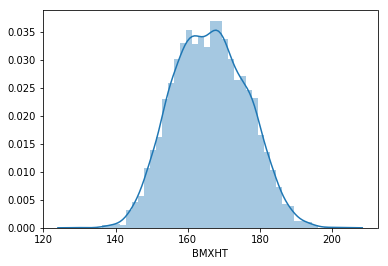

In [38]:
# insert your code here
sns.distplot(da.BMXHT.dropna())
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

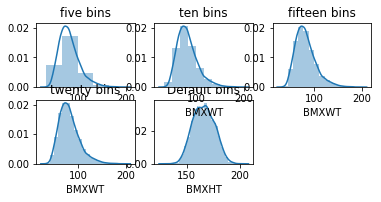

In [39]:
plt.subplot(3,3,5)
sns.distplot(da.BMXHT.dropna())
plt.title("Default bins")

plt.subplot(3,3,1)
sns.distplot(da.BMXWT.dropna(), bins = 5)
plt.title("five bins")

plt.subplot(3,3,2)
sns.distplot(da.BMXWT.dropna(), bins = 10)
plt.title("ten bins")

plt.subplot(3,3,3)
sns.distplot(da.BMXWT.dropna(), bins = 15)
plt.title("fifteen bins")


plt.subplot(3,3,4)
sns.distplot(da.BMXWT.dropna(), bins = 20)
plt.title("twenty bins")

plt.show

In [18]:
Males = da[(da['RIAGENDRx'] == "Male")] # this code here restricts the dataset to the male population
Males.groupby("RIAGENDRx") ["BMXHT"].value_counts() # normalize and ascending
# presents the results as proportions

RIAGENDRx  BMXHT
Male       171.6    23
           169.6    22
           168.4    20
           172.9    20
           178.9    20
           174.1    19
           176.0    19
           171.9    18
           172.8    18
           173.6    18
           174.2    18
           175.0    18
           175.9    18
           179.0    18
           169.0    17
           169.2    17
           174.9    17
           170.4    16
           170.5    16
           171.0    16
           173.3    16
           173.9    16
           174.6    16
           175.4    16
           175.5    16
           178.2    16
           178.5    16
           167.9    15
           168.0    15
           169.7    15
                    ..
           188.9     1
           189.1     1
           189.2     1
           189.3     1
           189.7     1
           189.8     1
           190.2     1
           190.3     1
           190.4     1
           190.8     1
           191.1     1
           191.2 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

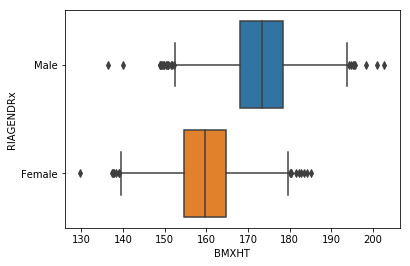

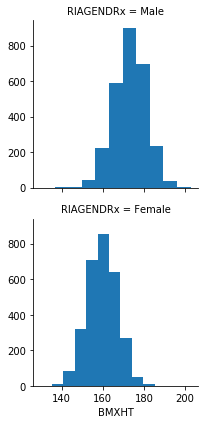

In [40]:
# insert your code here
sns.boxplot(x = da["BMXHT"], y = da["RIAGENDRx"])
g = sns.FacetGrid(da, row = "RIAGENDRx")
g = g.map(plt.hist, "BMXHT")



plt.show()

In [20]:
#The FacetGrid in the above cell functions as a way of partitioning the graph into multiple facets depending on the levels
#of the two categorical variables

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

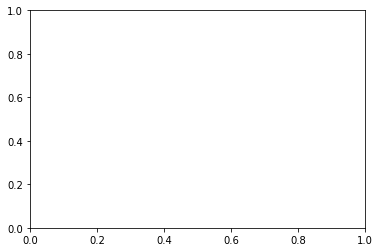

In [110]:
# insert your code 


__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [148]:
# insert your code here
da.groupby("BPXSY1") ["BPXSY2"].value_counts().unstack().fillna(0)



BPXSY2,84.0,86.0,88.0,90.0,92.0,94.0,96.0,98.0,100.0,102.0,104.0,106.0,108.0,110.0,112.0,114.0,116.0,118.0,120.0,122.0,124.0,126.0,128.0,130.0,132.0,134.0,136.0,138.0,140.0,142.0,144.0,146.0,148.0,150.0,152.0,154.0,156.0,158.0,160.0,162.0,164.0,166.0,168.0,170.0,172.0,174.0,176.0,178.0,180.0,182.0,184.0,186.0,188.0,190.0,192.0,194.0,196.0,198.0,200.0,202.0,206.0,208.0,210.0,212.0,220.0,226.0,238.0
BPXSY1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
84.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,1.0,2.0,4.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92.0,0.0,0.0,3.0,1.0,3.0,4.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94.0,0.0,0.0,0.0,4.0,12.0,5.0,7.0,6.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96.0,0.0,0.0,1.0,3.0,3.0,8.0,11.0,11.0,7.0,5.0,4.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,16.0,20.0,5.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,8.0,13.0,25.0,13.0,6.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
pd.set_option('display.max_columns', 100)

In [61]:
condition = da["BPXSY2"] < da["BPXSY1"]
add = da["BPXSY2"] + da["BPXSY1"]
prop = condition / add

da[condition]


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDMARTLx,RIAGENDRx,agegrp
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Married,Male,"(60, 70]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Divorced,Male,"(50, 60]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Married,Male,"(70, 80]"
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,1.0,4,22744.36,1,125,1.03,120.0,70.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0,Married,Female,"(30, 40]"
11,83750,1.0,NaN,3.0,1,1,45,5,1.0,2.0,5.0,5,96194.93,1,125,1.36,116.0,70.0,108.0,72.0,76.2,177.8,24.1,43.9,37.8,33.0,90.1,NaN,Never Married,Male,"(40, 50]"
13,83754,2.0,1.0,1.0,2,2,67,2,1.0,5.0,1.0,7,10495.87,1,128,0.89,124.0,76.0,116.0,64.0,117.8,164.1,43.7,34.8,38.6,42.7,123.0,2.0,Married,Female,"(60, 70]"
17,83761,1.0,NaN,1.0,2,2,24,5,2.0,5.0,5.0,1,15420.80,1,119,0.00,110.0,62.0,108.0,60.0,61.8,156.4,25.3,37.0,35.5,29.6,79.5,NaN,Never Married,Female,"(20, 30]"
19,83767,2.0,2.0,NaN,2,2,54,5,1.0,4.0,3.0,6,21914.04,2,122,2.99,136.0,82.0,126.0,82.0,59.0,149.9,26.3,32.7,33.3,30.4,88.9,2.0,Divorced,Female,"(50, 60]"
20,83769,1.0,NaN,2.0,2,1,49,5,1.0,2.0,1.0,4,26837.74,1,132,2.97,110.0,70.0,106.0,68.0,72.8,170.7,25.0,42.8,40.0,31.5,96.6,2.0,Married,Male,"(40, 50]"
21,83773,2.0,2.0,NaN,2,2,80,3,1.0,3.0,2.0,1,37582.05,1,131,3.57,148.0,56.0,146.0,68.0,67.7,149.8,30.2,33.4,36.2,30.3,108.4,2.0,Widowed,Female,"(70, 80]"


In [62]:
keep = ["BPXSY1", "BPXSY2"]
da[keep].head()

,BPXSY1,BPXSY2
0,128.0,124.0
1,146.0,140.0
2,138.0,132.0
3,132.0,134.0
4,100.0,114.0


In [79]:
y = da["BPXSY2"<"BPXSY1"]
if y == True:
        print(sum(y)/da["BPXSY1"])

KeyError: False

In [82]:
da[keep].shape

(5735, 2)

In [98]:
da["BPXSY2"].count().sum()

5535

In [90]:
lower = da["BPXSY2"]<da["BPXSY1"]
lower.dropna

<bound method Series.dropna of 0        True
1        True
2        True
3       False
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11       True
12      False
13       True
14      False
15      False
16      False
17       True
18      False
19       True
20       True
21       True
22       True
23       True
24       True
25      False
26      False
27       True
28      False
29      False
        ...  
5705     True
5706    False
5707    False
5708     True
5709     True
5710    False
5711     True
5712     True
5713     True
5714    False
5715    False
5716    False
5717    False
5718     True
5719    False
5720    False
5721     True
5722     True
5723     True
5724     True
5725    False
5726     True
5727    False
5728    False
5729    False
5730    False
5731     True
5732     True
5733    False
5734     True
Length: 5735, dtype: bool>

In [94]:
lower[lower==True].count().sum()

2463

In [95]:
2463/5735

0.42946817785527464

In [91]:
pd.Series.mean(da[da.BPXSY1 > da.BPXSY2].iloc[:, 16]) 

127.76045473000406

In [99]:
lower[lower==True].count().sum()/da["BPXSY2"].count().sum()

0.44498644986449865

In [ ]:
#you need to keep an eye out for other information that will enable to write the required code for this
#task. to perform this, i had to manually determine the separate values and then compute the proportion
#because i could not come up with the appropriate code that python understands.

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

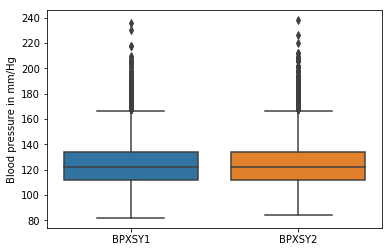

In [100]:
# insert your code here
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg") 

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [131]:
# insert your code here
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")

da.groupby("DMDEDUC2x") ["DMDHHSIZ"].value_counts(normalize=True, ascending=False).unstack()


#another way to get the proportion is to create a variable for the "groupby" command and type a code
#that calculates the proportion.
#Example
#dx = da.groupby("DMDEDUC2x") ["DMDHHSIZ"].value_counts().unstack()
#dx = dx.apply(lambda x: x/x.sum(), axis=1)
#print(dx.to_string(float_format="%2f")) this piece of code displays the values in two decimal places

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2x,,,,,,,
9-11,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
<9,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
College,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
Don't know,NaN,0.666667,NaN,NaN,0.333333,NaN,NaN
HS/GED,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
Missing,0.007663,0.084291,0.210728,0.226054,0.187739,0.134100,0.149425
Some college/AA,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [135]:
# insert your code here
da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)].groupby(["DMDEDUC2x", "RIAGENDRx"]) ["DMDHHSIZ"].median().unstack()

RIAGENDRx,Female,Male
DMDEDUC2x,,
9-11,5.0,4.5
<9,5.0,5.0
College,3.0,3.0
HS/GED,5.0,4.0
Some college/AA,4.0,4.0


In [140]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby(["agegrp", "RIAGENDRx", "DMDEDUC2x"]) ["DMDHHSIZ"].median().unstack() 

#the "pd.cut" command is more of a tool used to stratify into groups than a simple restriction between values.

DMDEDUC2x           9-11  <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                            
(30, 40] Female        5   5        4       5                4
         Male          5   5        3       4                4

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [142]:
# insert your code here
da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDRx"]) [["RIDAGEYR", "BMXHT", "BMXBMI"]].mean().unstack()

RIDAGEYR                  BMXHT                 BMXBMI  \
RIAGENDRx            Female       Male      Female        Male     Female   
SDMVSTRA SDMVPSU                                                            
119      1        47.663265  47.861111  159.570408  172.741667  30.052041   
         2        52.987952  54.363636  159.244578  172.906818  27.849398   
120      1        43.636364  43.130000  155.402041  169.537755  32.419388   
         2        43.736111  45.219178  159.218056  173.075342  27.400000   
121      1        44.397959  46.750000  158.871579  172.177885  30.856842   
         2        44.376344  42.063158  160.229032  174.764516  26.470968   
122      1        42.897436  44.653061  161.315385  173.998969  29.447436   
         2        47.333333  44.320000  157.231111  170.332323  26.611111   
123      1        44.841121  47.829787  162.059615  174.315217  29.905769   
         2        46.457447  52.126582  160.476596  174.454430  30.641489   
124      1        51.664000  50.750000  158.788710  172.109009  29.533065   
         2        42.541667  48.245614  162.853521  174.291228  28.640845   
125      1        50.900901  55.165289  160.762385  173.631092  30.385321   
         2        51.660000  49.705882  160.021429  174.456863  28.564286   
126      1        46.229167  48.416667  160.387500  175.149398  31.262500   
         2        47.205882  48.666667  160.892000  174.713043  29.612121   
127      1        49.694444  53.137931  157.422430  171.545349  32.189720   
         2        51.486239  54.070588  159.022936  173.366667  30.770642   
128      1        55.638462  53.673267  156.339062  169.325000  32.303125   
         2        45.589744  45.822785  160.437179  172.400000  27.491026   
129      1        45.329787  43.922222  156.900000  171.094318  29.019149   
         2        43.500000  45.775510  161.034259  173.138298  29.429630   
130      1        47.810526  50.516854  161.977895  176.974157  30.700000   
         2        50.833333  50.535354  160.060577  175.061224  31.490385   
131      1        54.893617  53.140187  161.989362  175.610476  30.061702   
         2        45.000000  46.778846  161.673810  175.091346  32.984127   
132      1        43.210526  42.380435  161.508421  172.534066  29.848421   
         2        51.700000  49.038760  159.138281  172.809524  30.540625   
133      1        45.105882  44.054795  158.295122  171.509722  27.959259   
         2        47.063158  47.489796  158.627368  171.179167  29.000000   

                             
RIAGENDRx              Male  
SDMVSTRA SDMVPSU             
119      1        26.958333  
         2        27.160465  
120      1        30.939175  
         2        27.727397  
121      1        29.416505  
         2        26.273118  
122      1        28.528866  
         2        25.744444  
123      1        29.231522  
         2        28.811392  
124      1        28.614414  
         2        27.714035  
125      1        29.727731  
         2        29.143564  
126      1        29.033333  
         2        29.039130  
127      1        31.062353  
         2        30.557831  
128      1        31.749000  
         2        26.835443  
129      1        26.493182  
         2        28.961702  
130      1        30.337079  
         2        29.237755  
131      1        28.259615  
         2        30.077885  
132      1        28.546154  
         2        28.966667  
133      1        27.495833  
         2        27.966667

In [146]:
#this bit of code computes the ratio between the largest and the smallest mean across the MVUs
#take note of the number and positions of brackets
(
    (
        da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDRx"]) 
        [["RIDAGEYR", "BMXHT", "BMXBMI"]]
        .max()
    )
/ 
(
    da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDRx"]) [["RIDAGEYR", "BMXHT", "BMXBMI"]]
    .min()
)
).unstack()

RIDAGEYR               BMXHT              BMXBMI          
RIAGENDRx           Female      Male    Female      Male    Female      Male
SDMVSTRA SDMVPSU                                                            
119      1        4.444444  4.444444  1.221838  1.231270  3.256684  2.994413
         2        4.444444  4.000000  1.267041  1.269385  4.045161  2.224390
120      1        4.444444  4.444444  1.254360  1.297715  3.666667  3.042105
         2        4.444444  4.444444  1.296011  1.271065  2.443182  2.875000
121      1        4.444444  4.444444  1.308458  1.252324  2.538462  3.104938
         2        4.444444  4.444444  1.249319  1.296036  3.349112  2.542373
122      1        4.444444  4.444444  1.232877  1.244646  3.066298  3.284916
         2        4.444444  4.444444  1.214035  1.272849  2.730539  1.902703
123      1        4.444444  4.444444  1.262143  1.210127  2.483333  3.039548
         2        4.444444  4.210526  1.237474  1.290116  2.947917  3.275000
124      1        4.444444  4.210526  1.259393  1.214700  3.656627  2.212871
         2        4.444444  4.210526  1.216480  1.204545  3.530387  2.436464
125      1        4.444444  4.444444  1.230070  1.266364  2.948571  3.271605
         2        4.444444  4.444444  1.248281  1.229072  3.437126  2.420765
126      1        4.210526  4.210526  1.223684  1.224347  3.395210  2.769231
         2        4.444444  4.444444  1.217753  1.244715  3.226994  2.355670
127      1        4.444444  4.444444  1.226573  1.219481  3.195531  3.220930
         2        4.444444  4.444444  1.267626  1.223082  3.184971  2.704142
128      1        4.000000  4.444444  1.277698  1.359029  3.160428  2.577114
         2        4.444444  4.444444  1.223135  1.271883  3.434483  2.734940
129      1        4.444444  4.444444  1.350810  1.209941  2.806630  2.124324
         2        4.444444  4.444444  1.245775  1.250484  3.413408  3.039326
130      1        4.444444  4.444444  1.227972  1.224691  3.261538  3.457831
         2        4.000000  4.444444  1.288210  1.255995  3.875862  2.994475
131      1        4.444444  4.210526  1.220938  1.203232  3.444444  3.357616
         2        4.444444  4.444444  1.203528  1.204759  3.822485  2.713568
132      1        4.210526  4.111111  1.198903  1.268568  3.121212  2.432161
         2        4.444444  4.444444  1.275562  1.292895  4.078788  3.512195
133      1        4.444444  4.444444  1.273934  1.265293  2.969512  2.502762
         2        4.444444  4.444444  1.202364  1.372161  3.706897  3.222222

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [147]:
# insert your code here
(
    (
        da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDRx"]) 
        [["RIDAGEYR", "BMXHT", "BMXBMI"]]
        .quantile(0.75)
    )
- 
(
    da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDRx"]) [["RIDAGEYR", "BMXHT", "BMXBMI"]]
    .quantile(0.25)
)
).unstack()

0.75             RIDAGEYR          BMXHT          BMXBMI       
RIAGENDRx          Female   Male  Female    Male  Female   Male
SDMVSTRA SDMVPSU                                               
119      1          31.25  29.75   9.325   9.000   9.750  5.350
         2          33.50  29.00   9.950  11.225   9.350  5.300
120      1          26.50  23.75   8.750  12.125   8.775  9.400
         2          25.75  26.00  10.550  10.500   7.750  7.100
121      1          26.25  34.50   9.150  10.725   9.000  7.500
         2          26.00  25.50   9.600   8.600   8.100  5.700
122      1          24.00  29.50  10.400   9.400   9.875  7.700
         2          25.00  30.00   7.575  10.150   8.475  4.100
123      1          30.50  28.25   9.675   9.350  10.450  8.050
         2          34.50  31.50  11.200   9.900   9.975  8.100
124      1          27.00  32.00   8.375   9.800   8.950  6.100
         2          23.50  31.00   8.650  11.600   9.000  8.700
125      1          31.00  29.00   9.100  10.350   8.000  8.300
         2          32.25  33.50  10.675   7.925  10.325  7.900
126      1          30.25  36.25   8.500  10.450  10.675  8.000
         2          31.75  34.00  12.025   8.125  10.350  6.850
127      1          27.25  30.00   7.700   9.025  11.750  8.200
         2          30.00  28.00  11.600  10.750   9.200  5.950
128      1          28.00  33.00   9.125   9.950   8.500  6.675
         2          22.00  25.50  10.650   9.850   9.375  5.800
129      1          24.75  20.75  10.375  12.300   9.500  6.025
         2          26.25  30.75   8.900  10.700   9.725  5.800
130      1          35.50  36.00   8.650   9.900  11.200  6.700
         2          30.25  28.50  10.225   8.625   8.050  8.375
131      1          35.75  36.00  10.025  10.500  11.075  7.525
         2          24.00  28.00   7.575   7.750  10.625  7.850
132      1          30.00  21.25  10.950  10.600  10.700  6.600
         2          33.00  38.00  10.100  10.550  11.750  9.600
133      1          34.00  33.00  10.300   8.925   8.300  6.425
         2          28.50  32.25   9.550   8.850   9.650  5.900

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.